In [1]:
import sys
sys.path.append("../")

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import annotations
from utils import open_pickle
from collections import defaultdict

from sklearn.metrics import classification_report

In [2]:
PREDS_PATH = "../biobert_re/output/test_predictions.txt"
ACTUALS_PATH = "../biobert_re/dataset/test_labels_rel.pkl"

In [3]:
preds_df = pd.read_csv(PREDS_PATH, sep='\t')
actual_dicts = open_pickle(ACTUALS_PATH)

In [4]:
def convert_actual_labels(actual_dicts):
    actual_df_dict = defaultdict(list)
    
    for i, actual_dict in enumerate(actual_dicts):
        actual_df_dict["index"].append(i)
        actual_df_dict["label"].append(actual_dict['label'])
        actual_df_dict["relation"].append(actual_dict['relation'].name)

    df = pd.DataFrame(actual_df_dict)
    return df

def gen_classification_reports(df):
    report = {}
    
    print("-"*55)
    print("Overall Classification Report")
    print(classification_report(
            df.label.astype(int),
            df.prediction.astype(int)))
    
    overall_report = classification_report(df.label.astype(int), 
                                           df.prediction.astype(int), 
                                           output_dict = True)
    report["overall"] = overall_report
    
    for relation in df.relation.unique():
        sub_df = df[df.relation==relation]
        print("-"*55)
        print("Classification Report for {} Relation".format(relation))
        print(classification_report(
                sub_df.label.astype(int),
                sub_df.prediction.astype(int)))
        
        rel_report = classification_report(sub_df.label.astype(int), 
                                           sub_df.prediction.astype(int), 
                                           output_dict = True)
        report[relation] = rel_report
    
    print("-"*55)
    return report

In [5]:
actual_df = convert_actual_labels(actual_dicts)

In [6]:
final_df = actual_df.merge(preds_df, how="left", on="index")

In [7]:
report = gen_classification_reports(final_df)

-------------------------------------------------------
Overall Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5448
           1       0.98      0.99      0.98      8203

    accuracy                           0.98     13651
   macro avg       0.98      0.98      0.98     13651
weighted avg       0.98      0.98      0.98     13651

-------------------------------------------------------
Classification Report for Dosage-Drug Relation
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       548
           1       0.99      0.99      0.99       864

    accuracy                           0.99      1412
   macro avg       0.99      0.99      0.99      1412
weighted avg       0.99      0.99      0.99      1412

-------------------------------------------------------
Classification Report for Form-Drug Relation
              precision    recall  f1-score   support

 

In [8]:
def plot_f1(report):
    relations = []
    f1_scores = []
    for k, v in report.items():
        relations.append(k)
        f1_scores.append(round(v['accuracy'], 2))


    plt.figure(figsize = (17, 7))
    plt.bar(relations, f1_scores, width=0.8)

    for i in range(len(relations)):
        plt.annotate(
            '{}'.format(f1_scores[i]),
            xy=(relations[i], f1_scores[i]),
            fontsize=13,
            ha='center',
            va='bottom'
        )

    plt.xlabel("")
    plt.ylabel("F1 Score", fontsize = 13)
    plt.title(
        "Great performance in RE task for each relation",
        fontsize = 14,
        pad = 20
    )
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.tight_layout()
    plt.savefig("../plots/re_f1.jpg", bbox_inches = "tight")
    plt.show()

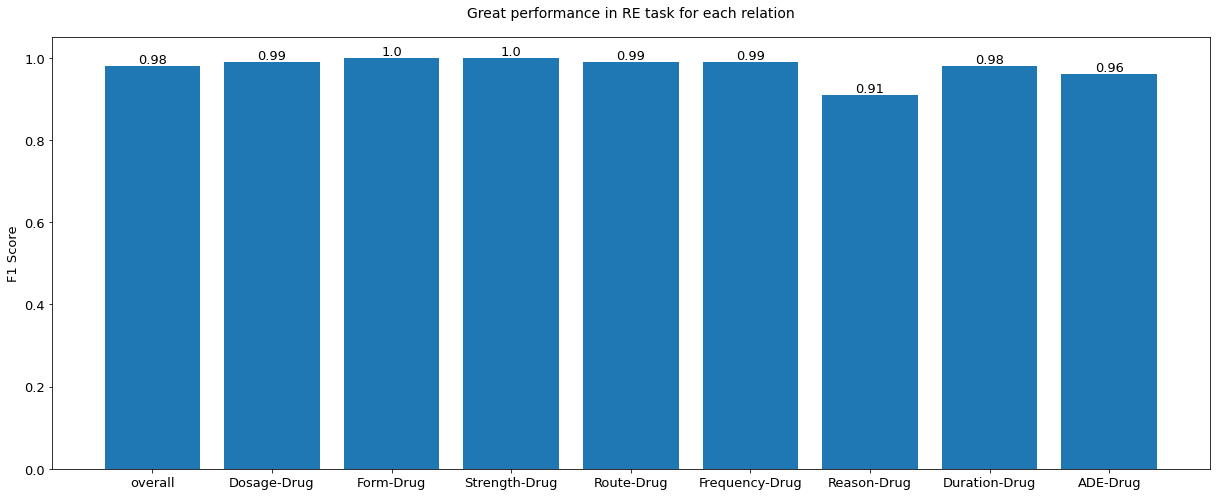

In [9]:
plot_f1(report)